In [1]:
import geopandas as gpd

In [22]:
url = 'https://www.datos.gov.co/resource/4rxi-8m8d.geojson'
params = {'$limit': 1005, '$offset': 0}  # Cambia el valor de limit según lo necesario

hurtos_colombia = gpd.read_file(url, params=params)
hurtos_colombia

,municipio,fecha_hecho,cantidad,cod_muni,cod_depto,departamento,geometry
0,MEDELLIN,2017-01-01,21,05001,05,ANTIOQUIA,None
1,SANTAFE DE ANTIOQUIA,2017-01-01,1,05042,05,ANTIOQUIA,None
2,APARTADO,2017-01-01,1,05045,05,ANTIOQUIA,None
3,BELLO,2017-01-01,4,05088,05,ANTIOQUIA,None
4,CAUCASIA,2017-01-01,1,05154,05,ANTIOQUIA,None
...,...,...,...,...,...,...,...
995,PAMPLONA,2017-01-10,1,54518,54,NORTE DE SANTANDER,None
996,ARMENIA,2017-01-10,3,63001,63,QUINDÍO,None
997,PEREIRA,2017-01-10,13,66001,66,RISARALDA,None
998,DOSQUEBRADAS,2017-01-10,1,66170,66,RISARALDA,None


,municipio,fecha_hecho,cantidad,cod_muni,cod_depto,departamento,geometry
0,MEDELLIN,2017-01-01,21,05001,05,ANTIOQUIA,None
1,SANTAFE DE ANTIOQUIA,2017-01-01,1,05042,05,ANTIOQUIA,None
2,APARTADO,2017-01-01,1,05045,05,ANTIOQUIA,None
3,BELLO,2017-01-01,4,05088,05,ANTIOQUIA,None
4,CAUCASIA,2017-01-01,1,05154,05,ANTIOQUIA,None
...,...,...,...,...,...,...,...
995,PAMPLONA,2017-01-10,1,54518,54,NORTE DE SANTANDER,None
996,ARMENIA,2017-01-10,3,63001,63,QUINDÍO,None
997,PEREIRA,2017-01-10,13,66001,66,RISARALDA,None
998,DOSQUEBRADAS,2017-01-10,1,66170,66,RISARALDA,None


In [3]:
hurtos_colombia_agrupados = hurtos_colombia.groupby("cod_muni")["cantidad"].agg(['sum'])
hurtos_colombia_agrupados

,sum
cod_muni,
05001,21342440303624291533
05002,111
05034,1
05042,1
05045,11112312
...,...
91001,111
91540,1
94001,11


In [4]:
hurtos_colombia["cantidad"] = hurtos_colombia["cantidad"].astype(int)

In [5]:
hurtos_colombia_agrupados = hurtos_colombia.groupby("cod_muni")["cantidad"].agg(['sum'])
hurtos_colombia_agrupados

,sum
cod_muni,
05001,286
05002,3
05034,1
05042,1
05045,30
...,...
91001,3
91540,1
94001,2


In [6]:
hurtos_colombia_agrupados.sort_values(by="sum", ascending = False)

,sum
cod_muni,
11001,1055
05001,286
76001,193
52001,188
50001,135
...,...
25407,1
25488,1
25513,1


In [7]:
municipios = gpd.read_file("/content/drive/MyDrive/Clase/PO II /2. Clase/COL_Municipio.zip")
municipios.head(5)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,05001,2559097,3.798647e+08,107257.930213,05001000,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
1,05002,20493,5.155810e+08,128215.738906,05002000,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
2,05004,2763,2.935562e+08,88851.398989,05004000,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
3,05021,4746,1.294922e+08,75725.519153,05021000,"POLYGON ((-8352494.010 715689.897, -8352304.86..."
4,05030,31600,8.456353e+07,50667.719094,05030000,"POLYGON ((-8425665.892 679202.380, -8425597.03..."


<Axes: >

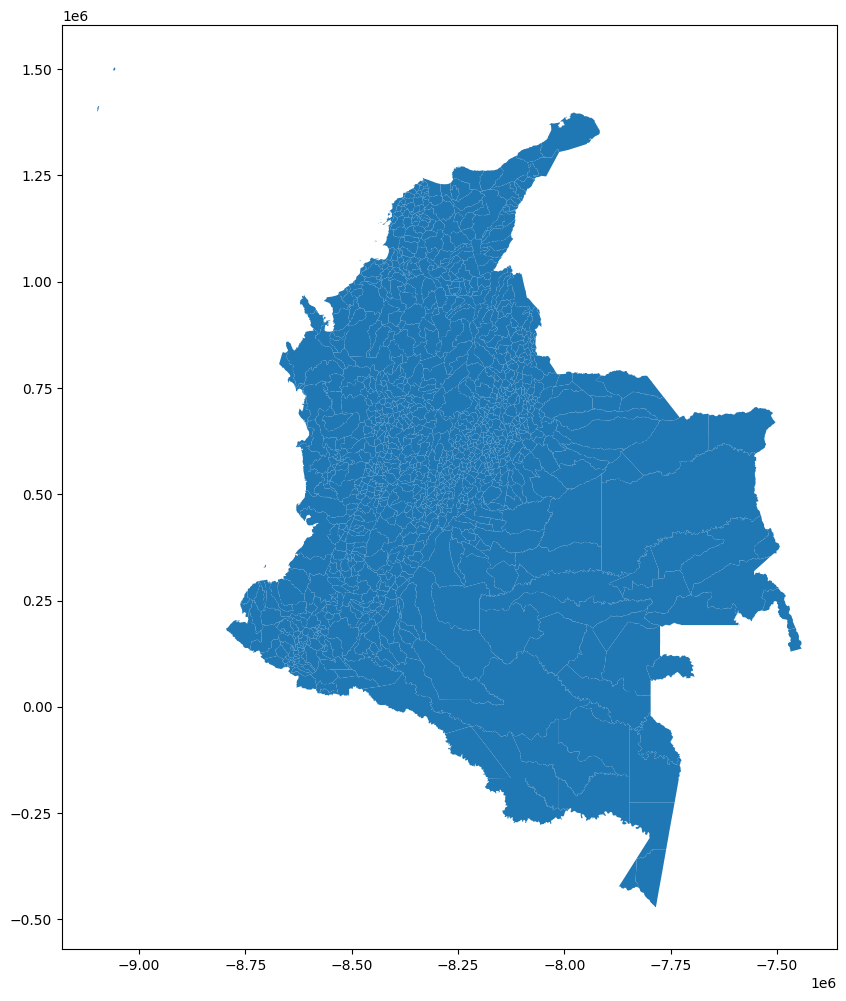

In [8]:
municipios.plot(figsize = (12,12))

In [9]:
municipios.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
municipios_mundial = municipios.to_crs("EPSG:4326")
municipios_mundial.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
municipios_mundial

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-75.66589 6.36965, -75.66542 6.36866..."
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-75.46740 5.94558, -75.46659 5.94444..."
2,05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((-76.08472 6.75061, -76.08442 6.75049..."
3,05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((-75.03173 6.41570, -75.03003 6.41513..."
4,05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((-75.68904 6.08988, -75.68843 6.08984..."
...,...,...,...,...,...,...
1117,97889,1108,4.669929e+09,4.292950e+05,97889000,"POLYGON ((-69.70213 1.10980, -69.70308 1.10670..."
1118,99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((-67.79481 6.32042, -67.79255 6.31711..."
1119,99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((-69.03111 6.19334, -69.02761 6.19239..."
1120,99624,4235,3.992354e+09,3.642825e+05,99624000,"POLYGON ((-70.66676 5.38608, -70.66512 5.38583..."


In [12]:
datos_colombia = municipios_mundial.merge(
    hurtos_colombia_agrupados,
    left_on = "cod_dane",
    right_on = "cod_muni")
datos_colombia

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,sum


In [13]:
hurtos_colombia_agrupados = hurtos_colombia_agrupados.reset_index(
    level=None, drop=False, inplace=False, col_level=0, col_fill='')
hurtos_colombia_agrupados

,cod_muni,sum
0,05001,286
1,05002,3
2,05034,1
3,05042,1
4,05045,30
...,...,...
330,91001,3
331,91540,1
332,94001,2
333,95001,1


In [14]:
datos = []
for x in hurtos_colombia_agrupados["cod_muni"]:
  datos.append("" + x + "000")

hurtos_colombia_agrupados["cod_muni"] = datos
hurtos_colombia_agrupados

,cod_muni,sum
0,05001000,286
1,05002000,3
2,05034000,1
3,05042000,1
4,05045000,30
...,...,...
330,91001000,3
331,91540000,1
332,94001000,2
333,95001000,1


In [15]:
datos_colombia = municipios_mundial.merge(
    hurtos_colombia_agrupados ,left_on = "cod_dane",
    right_on = "cod_muni")
datos_colombia

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,cod_muni,sum
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-75.66589 6.36965, -75.66542 6.36866...",05001000,286
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-75.46740 5.94558, -75.46659 5.94444...",05002000,3
2,05034,44647,4.575241e+08,1.183692e+05,05034000,"POLYGON ((-75.86159 5.75576, -75.86135 5.75533...",05034000,1
3,05042,27276,5.316765e+08,1.254714e+05,05042000,"POLYGON ((-75.83535 6.66026, -75.83402 6.65817...",05042000,1
4,05045,129039,5.706729e+08,1.399031e+05,05045000,"POLYGON ((-76.41427 7.96525, -76.41388 7.96189...",05045000,30
...,...,...,...,...,...,...,...,...
330,91001,50241,6.201627e+09,4.181075e+05,91001000,"POLYGON ((-69.97702 -3.00700, -69.97608 -3.007...",91001000,3
331,91540,10343,1.532550e+09,2.109202e+05,91540000,"POLYGON ((-70.35759 -3.69289, -70.35592 -3.694...",91540000,1
332,94001,34024,1.598526e+10,9.871200e+05,94001000,"POLYGON ((-67.67802 3.91122, -67.67381 3.90610...",94001000,2
333,95001,56386,1.686885e+10,1.521286e+06,95001000,"POLYGON ((-71.28923 2.86921, -71.28257 2.86742...",95001000,1


In [16]:
analisis_hurtos_colombia = datos_colombia.sort_values(by = "sum", ascending = False)
analisis_hurtos_colombia.head(3)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,cod_muni,sum
56,11001,7822431,1.657425e+09,414367.022837,11001000,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505...",11001000,1055
0,05001,2559097,3.798647e+08,107257.930213,05001000,"POLYGON ((-75.66589 6.36965, -75.66542 6.36866...",05001000,286
294,76001,2275444,5.675798e+08,122261.000357,76001000,"POLYGON ((-76.59379 3.54680, -76.59247 3.54645...",76001000,193


In [17]:
!pip3 install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.5 MB/s eta 0:00:00


<Axes: >

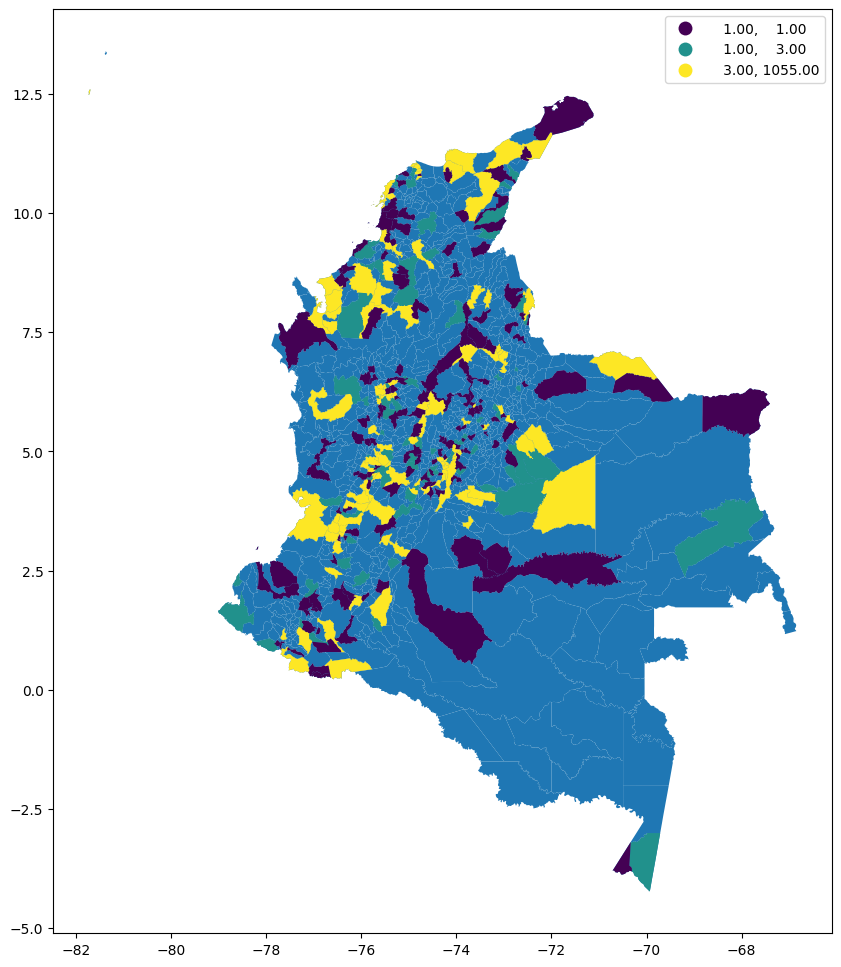

In [18]:
axis = municipios_mundial.plot(figsize = (12,12))
datos_colombia.plot(column ="sum",
                    scheme = "QUANTILES",
                    k = 3, ax = axis,
                    legend= True)